In [ ]:
import pandas as pd
import statsmodels
from statsmodels.tsa.stattools import adfuller

In [ ]:
df = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/production/course_5226/datasets/ch4_meat.csv", parse_dates=['date'], index_col='date')
df = df[['beef']]
df.head

<bound method NDFrame.head of               beef
date              
1944-01-01   751.0
1944-02-01   713.0
1944-03-01   741.0
1944-04-01   650.0
1944-05-01   681.0
...            ...
2012-07-01  2200.8
2012-08-01  2367.5
2012-09-01  2016.0
2012-10-01  2343.7
2012-11-01  2206.6

[827 rows x 1 columns]>

Un modèle ARIMA (AutoRegressive Integrated Moving Average) est une technique de modélisation statistique utilisée pour analyser et prévoir des séries chronologiques, c'est-à-dire des données qui varient au fil du temps. L'objectif est de comprendre la structure des données et de prévoir leur évolution future en fonction des tendances passées.

Le modèle ARIMA utilise trois types de termes pour modéliser les données temporelles:

Les termes autorégressifs (AR) qui modélisent la dépendance de la variable sur ses valeurs passées.
Les termes de moyenne mobile (MA) qui modélisent la dépendance de la variable sur les erreurs passées.
Les termes intégrés (I) qui modélisent la différence entre les valeurs observées et les valeurs attendues en fonction des tendances passées.
Le paramètre "order" dans un modèle ARIMA est un tuple qui définit les ordres des termes AR, I et MA à utiliser dans le modèle. Il est noté (p, d, q) où :

p : l'ordre des termes autorégressifs (AR). Cela représente le nombre de valeurs passées utilisées pour prédire la valeur actuelle.
d : l'ordre des termes intégrés (I). Cela représente le nombre de différences nécessaires pour rendre la série chronologique stationnaire (constante moyenne et variance).
q : l'ordre des termes de moyenne mobile (MA). Cela représente le nombre d'erreurs passées utilisées pour prédire la valeur actuelle.
Le choix des valeurs de p, d et q dépend de la nature des données temporelles et doit être déterminé par des techniques de modélisation et d'analyse de données, telles que les tests statistiques et les graphiques de série chronologique.

**Le graphique de corrélation partielle (PACF)**

Le graphique PACF peut être utilisé pour identifier l'ordre p des termes AR dans le modèle ARIMA. Le graphique PACF montre la corrélation partielle entre la série chronologique et ses valeurs retardées

**Le graphique de corrélation (ACF)**

Le graphique ACF peut être utilisé pour identifier l'ordre q des termes MA dans le modèle ARIMA. Le graphique ACF montre la corrélation entre la série chronologique et ses erreurs de prédiction.

Concretement, il permet de visualiser la corrélation entre une série temporelle et ses observations passées (lagged values), c'est-à-dire la corrélation entre une observation et une ou plusieurs observations précédentes.

**Choix du nombre de lags**

Le choix du nombre de retards (lags) à inclure dans les graphiques ACF et PACF dépend de la fréquence d'échantillonnage des données et de la nature de la série chronologique. Voici quelques règles de base pour aider à déterminer le nombre de lags à inclure dans ces graphiques :

Pour un échantillonnage quotidien ou hebdomadaire, un nombre de lags entre 20 et 50 est généralement approprié.

Pour un échantillonnage mensuel, un nombre de lags entre 12 et 24 est souvent suffisant.

Pour un échantillonnage annuel, un nombre de lags entre 3 et 5 est souvent suffisant.

### PACF

Le graphique PACF est un outil utile pour identifier les lags qui ont une corrélation directe significative avec les observations, après avoir éliminé l'effet des autres lags.

Pour interpréter le graphique PACF, il est important de rechercher les pics significatifs qui sortent de la zone de confiance.

Un pic significatif à un lag particulier peut suggérer la présence d'un modèle MA(q).

On suggère alors que q est égal aux nombres de pic hors zone de confiance. Mais cela doit être verifié par des tests sur les paramètres du model ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


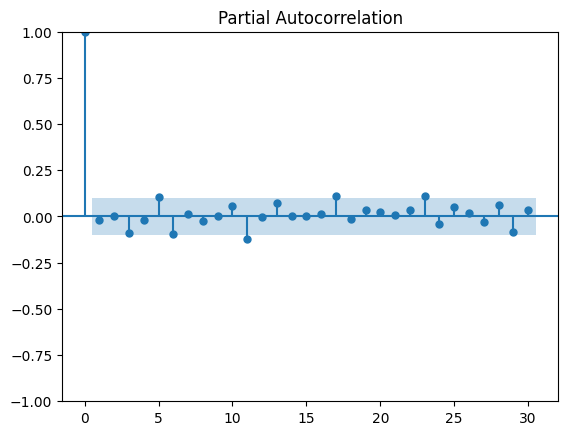

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
import random

# Définition de la série chronologique
ts = []
for i in range(365):
    ts.append(random.randint(1, 100))

# Tracé du graphique PACF
plot_pacf(ts, lags=30)
plt.show()

### ACF

Pour analyser le graphique ACF, il est important de chercher les pics significatifs qui sortent de la zone de confiance, car cela peut indiquer une autocorrélation significative et suggérer la présence d'un modèle AR(p).

On suggère alors que p est égal aux nombres de pic hors zone de confiance. Mais cela doit être verifié par des tests sur les paramètres du model ARIMA

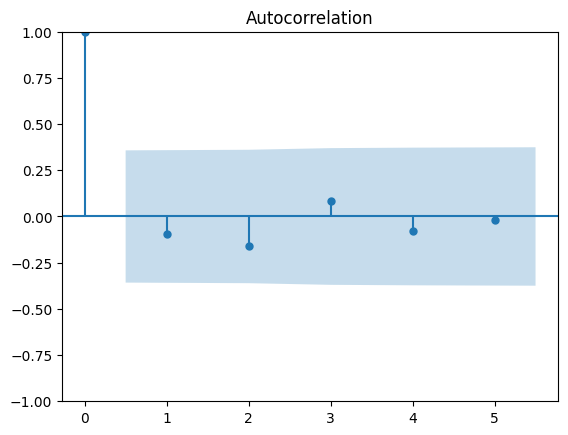

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import random

# Définition de la série chronologique
ts = []
for i in range(30):
    ts.append(random.randint(70, 100))

# Tracé du graphique ACF
plot_acf(ts, lags=5)
plt.show()

Paramètre du modèle
Le modèle ARIMA a trois paramètres, chacun correspondant à chaque « composante » du modèle. Il s’écrit ARIMA(p, d, q) où p, d et q sont des entiers naturels et constituent les paramètres du modèle.

p :est le nombre de décalages qu’il faudra considérer pour le modèle auto-régressif. Si
p est égal à 3 , alors le modèle considère que
Xt dépend (linéairement) de Xt-1,Xt-2 et Xt-3


d : est le nombre de fois qu’il faut différencier la série afin de la rendre stationnaire.
d doit être égale à 0 dans le cas d’un processus déjà stationnaire.

q : est l’ordre du modèle MA.

NB : p ou q peuvent aussi être égale à 0. ARIMA(0, d, q) correspond donc à un MA(q) et ARIMA(p, d, 0) correspond à un AR(p).

### Determiner les meilleurs paramètres ARIMA

In [ ]:
import statsmodels.api as sm

# Définir les différentes valeurs de p, d et q à tester
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)

# Stocker les résultats de l'AIC pour chaque combinaison de paramètres
aic_results = []

# Boucler sur toutes les combinaisons possibles de p, d et q
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = sm.tsa.ARIMA(df, order=(p,d,q)).fit()
                # Stocker l'AIC pour ce modèle
                aic_results.append((p,d,q,model.aic))
            except:
                continue

print('BEST MODEL', sorted(aic_results, key=lambda x: x[3])[0])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

BEST MODEL (1, 4, 4, 3471.5685303320515)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
y = df['beef'].resample('MS').mean()
y

date
1944-01-01     751.0
1944-02-01     713.0
1944-03-01     741.0
1944-04-01     650.0
1944-05-01     681.0
               ...  
2012-07-01    2200.8
2012-08-01    2367.5
2012-09-01    2016.0
2012-10-01    2343.7
2012-11-01    2206.6
Freq: MS, Name: beef, Length: 827, dtype: float64

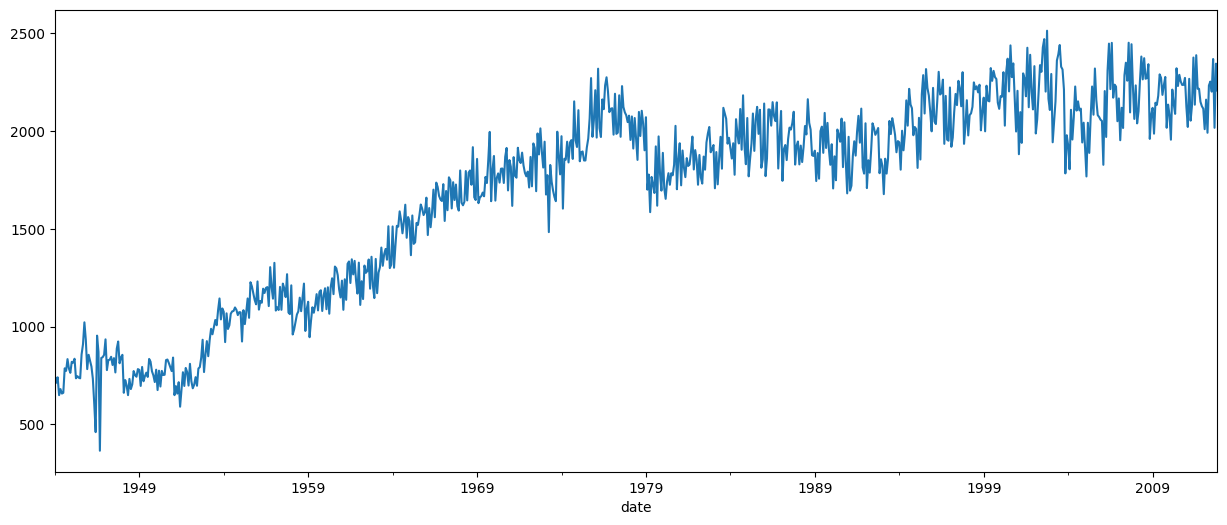

In [ ]:
y.plot(figsize=(15, 6))
plt.show()

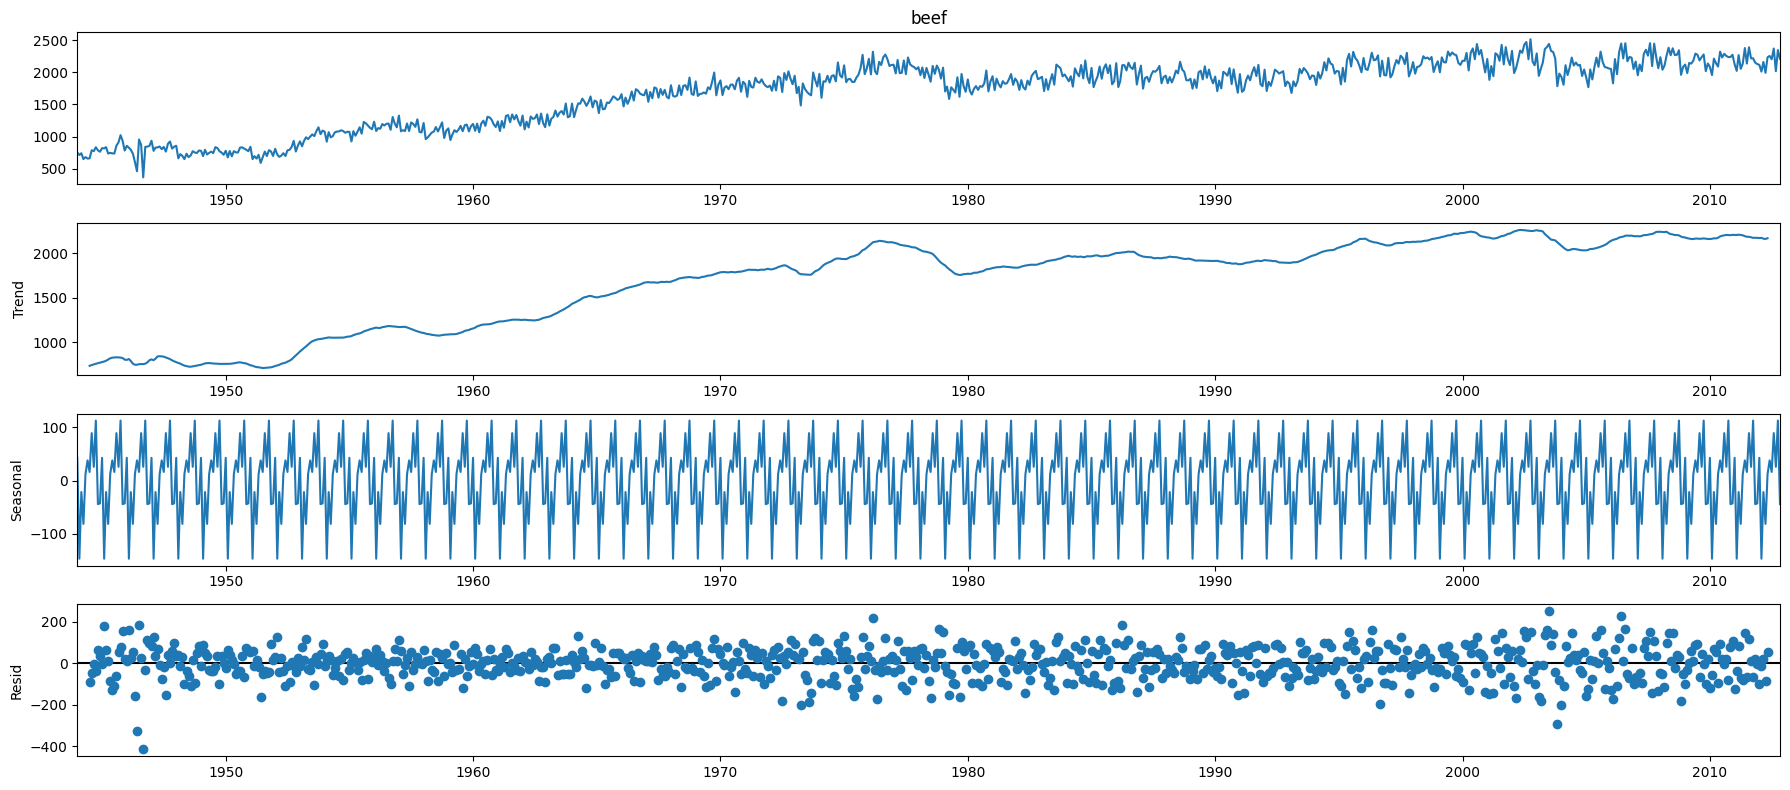

In [ ]:
#
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
# MODELE SARIMA
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(indexedDataset,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

## Application

Entrainez vous, à partir d'une time serie non stationnaire, a effectuer des graphiques ACF, PACF. Puis effectuez des transformations pour rendre la serie stationnaire. A chaque transformation, re-effectuez les graphiques et observez les changements de pics significatifs